In [23]:
from __future__ import division
from __future__ import print_function

In [3]:
import gzip

def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into a list of headers 
        and fragment sequences for each sequence contained"""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().encode(.split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

In [4]:
header, seq = loadFasta("data/LTR14A.fa")
print(len(header), "sequences")
for i in range(len(header)):
    print(header[i])
    print(len(seq[i])-1, "bases", seq[i][:30], "...", seq[i][-30:])

1 sequences
DF0000410.4 LTR14A
344 bases +tgggagaaaagctgagtgttgggagagaa ... gacctggtgttgggtctgatcaccccaaca


In [5]:
def revComp(dnaSeq):
    return ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(dnaSeq)])

In [7]:
print(ltr)

+TGGGAGAAAAGCTGAGTGTTGGGAGAGAAGCTGAGGCAGGGCTTGCATGTCTGCTAGACTTGCTGGCTCCTTGCTTCTAGCACTCCCATTATCTCAAGCAGCCATATGTTTCTCATTCACTTGATACACCGTTTCCTTTCAACCCCCACATCCTCACCACCTGTTTCTTTGTTTGAGCACCAATAAATAGCGTGGGCTCCCAGAGCTCGGGGCCTTCGCAGCCTCCACACTCGCGATGGCCCCCTGGTCCCACTTTCTCTCTCAAACTGTCTTTTTCTCATTCCTTTGACTCCGCCGGACTTCGTCGCCCCCACGACCTGGTGTTGGGTCTGATCACCCCAACA


In [12]:
print("-"+revComp(ltr[1:]))

-TGTTGGGGTGATCAGACCCAACACCAGGTCGTGGGGGCGACGAAGTCCGGCGGAGTCAAAGGAATGAGAAAAAGACAGTTTGAGAGAGAAAGTGGGACCAGGGGGCCATCGCGAGTGTGGAGGCTGCGAAGGCCCCGAGCTCTGGGAGCCCACGCTATTTATTGGTGCTCAAACAAAGAAACAGGTGGTGAGGATGTGGGGGTTGAAAGGAAACGGTGTATCAAGTGAATGAGAAACATATGGCTGCTTGAGATAATGGGAGTGCTAGAAGCAAGGAGCCAGCAAGTCTAGCAGACATGCAAGCCCTGCCTCAGCTTCTCTCCCAACACTCAGCTTTTCTCCCA


In [6]:
ltr = seq[0].upper()
K = 19
forward = dict([(ltr[i:i+K], i) for i in range(1,len(ltr)-K+1)])
print(len(forward))
rev = "-" + revComp(ltr[1:])
reverse = dict([(rev[i:i+K], -i) for i in range(1,len(rev)-K+1)])
print(len(reverse))

# Check if any k-mer is in both lists
for key in forward:
    if key in reverse:
        print(key)

326
326


In [34]:
import time

DATA = "../HumanGenome/"
chromo = [str(i) for i in range(1,23)] + ['X', 'Y', 'MT']

chrSize = []
ltrFind = []
for contig in chromo:
    tick = time.time()
    with open(DATA+"Chr%s.seq" % contig, 'r') as fp:
        chrseq = fp.read()
    chrSize.append(len(chrseq))
    position = []
    for i in range(1,len(chrseq)-K+1):
        kmer = chrseq[i:i+K]
        if (kmer in forward):
            position.append((contig,i,forward[kmer]))
        elif (kmer in reverse):
            position.append((contig,i,reverse[kmer]))
        else:
            if (len(position) > 2) and (position[-2][2] == 0) and (position[-1][2] == 0):
                position.pop()
            position.append((contig,i,0))
    tock = time.time()
    print(contig, len(chrseq), len(position), "%6.2f secs" % (tock - tick))
    tick = tock
    ltrFind.append([tup for tup in position])

1 248956423 1698 206.83 secs
2 242193530 1265 198.56 secs
3 198295560 1060 172.44 secs
4 190214556 786 164.45 secs
5 181538260 1243 160.22 secs
6 170805980 1393 158.48 secs
7 159345974 1301 158.59 secs
8 145138637 345 149.62 secs
9 138394718 511 121.43 secs
10 133797423 2181 121.22 secs
11 135086623 914 114.60 secs
12 133275310 638 119.27 secs
13 114364329 620 102.00 secs
14 107043719 209  89.80 secs
15 101991190 839  86.46 secs
16 90338346 173  78.63 secs
17 83257442 701  73.82 secs
18 80373286 288  70.33 secs
19 58617617 693  46.74 secs
20 64444168 118  52.12 secs
21 46709984 347  38.38 secs
22 50818469 924  40.24 secs
X 156040896 1665 140.81 secs
Y 57227416 391  49.32 secs
MT 16570 3   0.02 secs


# Big Picture

In [1]:
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

fig = plot.figure(figsize=(16,6))
for j in range(len(chrSize)):
    lo, hi = (0, chrSize[j])
    x = [position for contig, position, offset in ltrFind[j]]
    y = [2*j+1+offset/350.0 for contig, position, offset in ltrFind[j]]
    print(chrSize[j], len(x))
    plot.plot(x,y)
    
plot.show()

NameError: name 'chrSize' is not defined

# Zoomed In

226


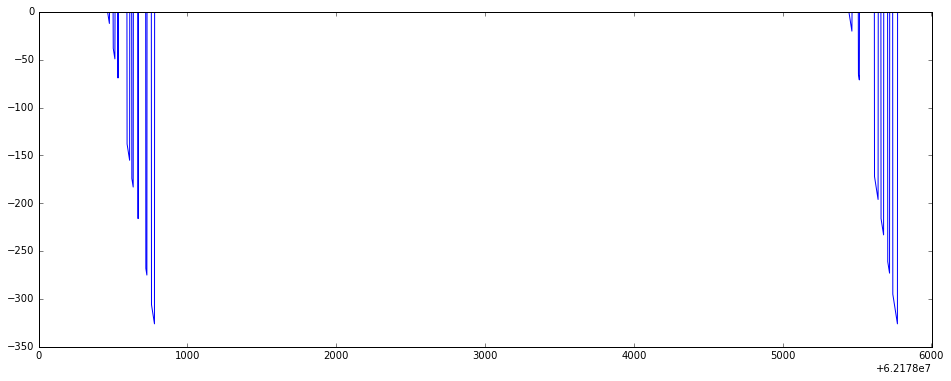

In [39]:
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline


j = 0      # chromosome 1

#lo, hi = (0, 250000000)
lo, hi = (62000000, 62500000)
#lo, hi = (99000000, 110000000)

x = [position for contig, position, offset in ltrFind[j] if position >= lo and position < hi]
y = [offset for contig, position, offset in ltrFind[j] if position >= lo and position < hi]
print(len(x))

fig = plot.figure(figsize=(16,6))
plot.plot(x,y)
plot.show()

In [14]:
contig = "1"
with open(DATA+"Chr%s.seq" % contig, 'r') as fp:
    chrseq = fp.read()
print(chrseq[62178464:62183771+K])

TGTTGGGGTGATCAGACCCAACACCAGGTCATGGGGACGACGAAGTCCGGCGGAGTCAAAGGAATGATTAAAAAGACAGTTTGAGAGAAGTGGGCCCAGGGGGCCATCGTGTGAGGCTGCGAAGGCCCCAAGCTCTGGGAGCCCACGCTATTTATTGGTGCTCAAAGAAACAGGTGGTGAGGATGTGGGGTTTGAAAAGAAACAGTGTATCAAGTGAATGAGAGACATATGGCTACTTGAGATAATGGCAGTGCTGGAAGCAAGGAGCCAGCAAGTCTAGCACACATGCAAGCTCTGCCTCAGCTTCTCTCCCAACACTCAGCTTTTCTCCCAACATGCCCCCCTTCTCTTTTTTGTAAAAACCGCCACAGCTATCATTATTACTAGCATAAGGTGGCCTCTTTCTAAAATTAATTGAGCAAGGCAATCACAGGCTGTGCAGCCCTTAATTGCCAGTTGGTGATCCAGCTTCATTTTTCTTAGCCCTTATTCAAAATGGAGTCGCTCTGGTTTGAATGCTTCCTACATATTTCCCCTTTCCCTTTTACAGAGGACCCTTAATCCTAGGGGTTGCAGAAGGATGAAGGTCCACCTTCTGTAACTTCATGCTGAATAGGGGCGATGATACTCCTGCCTACCTATTAGGGTCTCTTGTATTCAGGGTAGAGAGGAGTTCAGTCAGAAAGCATTGGTTCGTTAAGTATCTATAGGTAAAACCCTGGCACTCCAGCACTTTCTCAGCATGGCTCATACTAGGGGAACCCAGTCCATGGTTGGGATCCATGGGTCCTTCCAGTCTCCTGTTCCATGGTCGTACACATCTTGAGGGCACCTACGTGGTTTGTTCATCTCCTGCAAAAACACAAGCATACCTTCACCCCCATGTTAGTAAATCTACTGAAACAGAAGCAAAAACGTTTGTGGCTGTAGCTGGGAGGCATGCTATTGCTGAAGCATTTGTAACTCAGCTTCTGCCTCTTTGGTTAATTACCATGGGGCA

In [9]:
with open("../HumanGenome/Chr4.seq", 'r') as fp:
    seq = fp.read().encode('ascii', 'ignore')
print(len(seq))

190214556


In [3]:
CG = 0
for i in range(1,len(seq)):
    if seq[i] == 'C' or seq[i] == 'G':
        CG += 1
print((100*CG)/float(len(seq)-1))

38.1506036696


In [4]:
!pwd

/mnt/c/Users/mcmillan/Notebooks/Comp555S22


In [5]:
!ls

ClassRoster.csv       Lecture01.pdf    Lecture04.pdf
CreateAccounts.ipynb  Lecture02.ipynb  passwd.db
data		      Lecture02.pdf    ProblemSet01.ipynb
Exercises	      Lecture03.ipynb  ProblemSet01Play.ipynb
iSQL.py		      Lecture03.pdf    Syllabus.pdf
iSQL.pyc	      Lecture04.ipynb  upload


-rwxrwxrwx 1 mcmillan mcmillan 133797423 Jul  1  2020 ../HumanGenome/Chr10.seq
-rwxrwxrwx 1 mcmillan mcmillan 135086623 Jul  1  2020 ../HumanGenome/Chr11.seq
-rwxrwxrwx 1 mcmillan mcmillan 133275310 Jul  1  2020 ../HumanGenome/Chr12.seq
-rwxrwxrwx 1 mcmillan mcmillan 114364329 Jul  1  2020 ../HumanGenome/Chr13.seq
-rwxrwxrwx 1 mcmillan mcmillan 107043719 Jul  1  2020 ../HumanGenome/Chr14.seq
-rwxrwxrwx 1 mcmillan mcmillan 101991190 Jul  1  2020 ../HumanGenome/Chr15.seq
-rwxrwxrwx 1 mcmillan mcmillan  90338346 Jul  1  2020 ../HumanGenome/Chr16.seq
-rwxrwxrwx 1 mcmillan mcmillan  83257442 Jul  1  2020 ../HumanGenome/Chr17.seq
-rwxrwxrwx 1 mcmillan mcmillan  80373286 Jul  1  2020 ../HumanGenome/Chr18.seq
-rwxrwxrwx 1 mcmillan mcmillan  58617617 Jul  1  2020 ../HumanGenome/Chr19.seq
-rwxrwxrwx 1 mcmillan mcmillan 248956423 Jul  1  2020 ../HumanGenome/Chr1.seq
-rwxrwxrwx 1 mcmillan mcmillan  64444168 Jul  1  2020 ../HumanGenome/Chr20.seq
-rwxrwxrwx 1 mcmillan mcmillan  46709984 Jul  1  2020